**Number classifier on MNIST dataset using convolutional neurons**

In [1]:
import torch
from torchvision import datasets # get the MNIST dataset
import torchvision.transforms as transforms
import numpy as np # view images
import matplotlib.pyplot as plt # allows us to plot the images

In [2]:
batch_size = 20 # how many samples in each batch of the data
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {}".format(device))
# convert data to a PyTorch tensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders, which download the dataset to train on
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=0, shuffle=False)

Using cuda


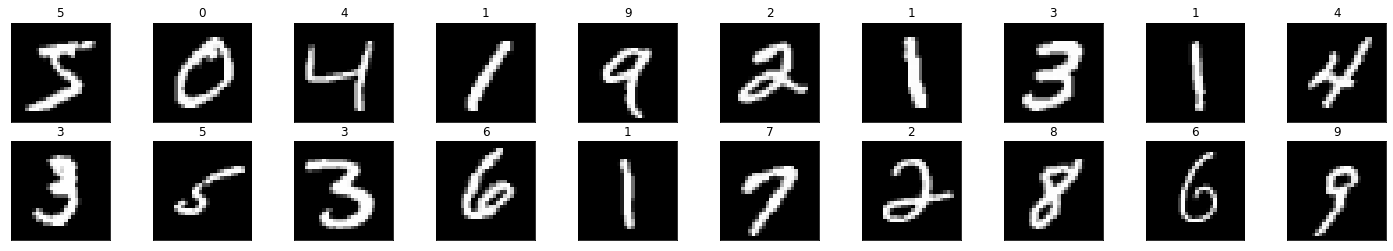

In [3]:
%matplotlib inline 
# command for python notebooks

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20): # get 20 images
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray') # add the black and white images
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [4]:
import torch.nn as nn
## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cnn = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2),
                nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2),       
        )

        self.linear =  nn.Linear(32 * 5 * 5, 10) 
    
    def forward(self, x):
        x = x.to(device)
        # Set 1
        out = self.cnn(x)
        
        #Flatten
        out = out.view(out.size(0), -1)

        #Dense
        out = self.linear(out)
        
        return out.to(device)

# initialize the NN
model = Net()
model = model.to(device)
print(model) # see the model structure

Net(
  (cnn): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Linear(in_features=800, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss() # error function to use for optimization
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # use gradient descent

In [6]:
# number of epochs to train the model
epochs = 15

model.train() # prep model for training (PyTorch handles things like weight init, dropout, etc.)

for epoch in range(epochs):
    # monitor training loss
    train_loss = 0.0
    for data, target in train_loader:
        target = target.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward prop: compute predicted outputs by passing inputs to the model
        output = model(data).to(device)
        # calculate the loss
        loss = criterion(output, target)
        # backprop: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single gradient descent step
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))



Epoch: 1 	Training Loss: 1.742106
Epoch: 2 	Training Loss: 0.499566
Epoch: 3 	Training Loss: 0.366084
Epoch: 4 	Training Loss: 0.314102
Epoch: 5 	Training Loss: 0.276328
Epoch: 6 	Training Loss: 0.245168
Epoch: 7 	Training Loss: 0.218957
Epoch: 8 	Training Loss: 0.197077
Epoch: 9 	Training Loss: 0.179031
Epoch: 10 	Training Loss: 0.164247
Epoch: 11 	Training Loss: 0.152130
Epoch: 12 	Training Loss: 0.142103
Epoch: 13 	Training Loss: 0.133711
Epoch: 14 	Training Loss: 0.126617
Epoch: 15 	Training Loss: 0.120532


Now that our model has been trained, let's see what it can do!

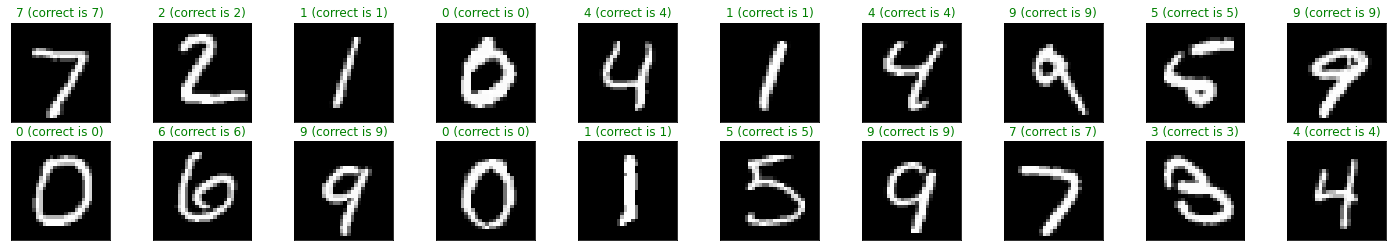

In [7]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

# perform prediction
output = model(images).to(device)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} (correct is {})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red")) # if the prediction is correct, set the label green, otherwise, set it to be red

Now, let's get some random samples to test the model

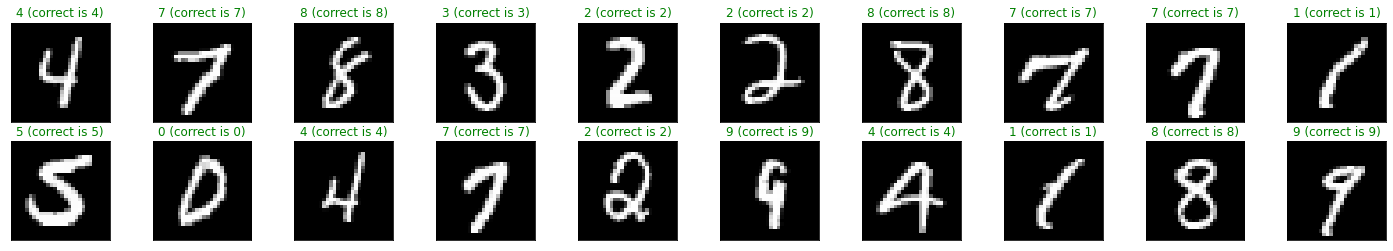

In [8]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=0, shuffle=True)
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

# perform prediction
output = model(images).to(device)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} (correct is {})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red")) # if the prediction is correct, set the label green, otherwise, set it to be red